In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from src.gameSimulation import GameUr,Strategies,Player,Dice,GameSettings,Multirun
from multiprocessing import Process, Queue
import multiprocessing as mp





In [2]:
s = Strategies.RandomStrategy()
p0 = Player.Player(0, 7, s)
p1 = Player.Player(1, 7, s)
d = Dice.MultiD2Dice(4)
gs = GameSettings.GameSettings([p0, p1], d, 4, 8, 2, [8], [4, 8, 13])


In [3]:
g = GameUr.GameUr(gs)
g.run()
g.getStonesHistory()

{'winner': Player: id:0, strategy:<src.gameSimulation.Strategies.RandomStrategy object at 0x0000027D5F113F40>, stones:p0s0,p0s1,p0s2,p0s3,p0s4,p0s5,p0s6,
 'gameLength': 48,
 'history': {'stones': {'p0s0': [0,
    4,
    4,
    4,
    4,
    4,
    4,
    4,
    4,
    4,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    7,
    8,
    8,
    8,
    8,
    8,
    8,
    8,
    11,
    11,
    11,
    11,
    11,
    11,
    11,
    11,
    11,
    11,
    11,
    11,
    11,
    13,
    13,
    13,
    13,
    13,
    13,
    14,
    14,
    14,
    14,
    14,
    14,
    14,
    14,
    14,
    14,
    14,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    15,
    1

In [6]:
h = Multirun.multirun(100,gs)
gl = [x["gameLength"] for x in h]   

10
11
110
start pool
finish pool


In [7]:
gl_stacked = [(i,gl.count(i)) for i in range(np.min(gl),np.max(gl)+1)]

gl_stacked
np.average(gl)
# np.min(gl)
# np.max(gl)


48.054545454545455

<BarContainer object of 17 artists>

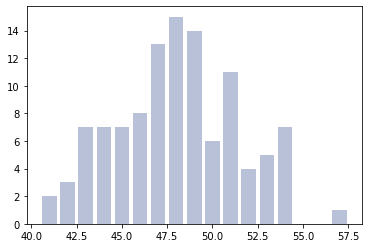

In [8]:
plt.bar([x for x, _ in gl_stacked], [
        y for _, y in gl_stacked], color=(0.1, 0.2, 0.5, 0.3))


In [9]:
currGame = h[0]


currGame



{'winner': Player: id:1, strategy:<src.gameSimulation.Strategies.RandomStrategy object at 0x0000027D7813ABF0>, stones:p1s0,p1s1,p1s2,p1s3,p1s4,p1s5,p1s6,
 'gameLength': 44,
 'history': {'stones': {'p0s0': [0,
    0,
    0,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    2,
    2,
    2,
    2,
    2,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    5,
    8,
    8,
    8,
    8,
    8,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    9,
    10,
    10,
    10,
    10,
    10,
    10,
    10,
    10,
    11,
    11,
    11,
    11,
    11,
    11,
    11],
   'p0s1': [0,
    0,
    0,
    0,
    

In [ ]:
game_length = 14

current_pos = -1

step_count = 0



while current_pos <= game_length:
       step_count += 1
       for i in range(current_pos):
              print(" ", end='')
       print("┠", end='')
       move_dist = random.choice([0,0,1,1])+random.choice([0,0,1,1])+random.choice([0,0,1,1])
       for i in range(move_dist-1):
              print("─", end='')
       print("┨ "+ str(move_dist) )

       current_pos+= move_dist

       print("┠╂", end='')
       for i in range(game_length-1):
              print("┬", end='')
       print("╂┨ "+str(current_pos))
       for i in range(current_pos):
              print(" ", end='')
       print("┃")

 


┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 0
┃
┠┨ 0
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 0
┃
┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 1
 ┃
 ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 3
   ┃
   ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 5
     ┃
     ┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 6
      ┃
      ┠──┨ 3
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 9
         ┃
         ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 11
           ┃
           ┠─┨ 2
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 13
             ┃
             ┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 14
              ┃
              ┠┨ 1
┠╂┬┬┬┬┬┬┬┬┬┬┬┬┬╂┨ 15
               ┃
